# **Ονοματεπώνυμο: ΘΕΟΦΑΝΟΠΟΥΛΟΣ ΜΙΧΑΗΛ**
# **Αριθμός Μητρώου: 111 520 18 00 053**


**2η Εργασία Τεχνικές Εξόρυξης Δεδομένων**

In [ ]:
import pandas as pd

dataSet = pd.read_csv('/content/drive/MyDrive/train.csv')
testSet = pd.read_csv('/content/drive/MyDrive/test.csv')
targetSet = pd.read_csv('/content/drive/MyDrive/target.csv')

**Ανάλυση Δεδομένων**

All cells of the first part of the project use the whole dataset, so the results are optimal and as clear as possible.

**1)**The following is a function that removes the outlier rows of a dataframe's column given.

In [ ]:
import numpy as np

def outliersRemoval(column):

  Q1 = np.percentile(column, 25,interpolation = 'midpoint')
  Q3 = np.percentile(column, 75,interpolation = 'midpoint')
  IQR = Q3 - Q1
    
  upper = np.where(column >= (Q3+2*IQR))
  lower = np.where(column <= (Q1-2*IQR))
  
  dataSet.drop(upper[0], inplace = True)
  dataSet.drop(lower[0], inplace = True)

We remove the ourliers of the 'trip_duration' column and use describe() function in order to get an image of the statistics of the specific column.

In [ ]:
outliersRemoval(dataSet['trip_duration'])

dataSet['trip_duration'].describe()

count    1.128770e+06
mean     7.603082e+02
std      4.894109e+02
min      1.000000e+00
25%      3.890000e+02
50%      6.430000e+02
75%      1.020000e+03
max      2.430000e+03
Name: trip_duration, dtype: float64

**2)** The following function is used in order to remove the geographical borders of a dataframe given.

In [ ]:
def bordersRemoval(dataset,longx,longy,latx,laty):

  dataSet.drop(dataset[(dataset['pickup_longitude'].lt(longx) | dataset['pickup_longitude'].ge(longy)) | (dataset['pickup_latitude'].lt(latx) | dataset['pickup_latitude'].gt(laty))].index,inplace=True)
  dataSet.drop(dataset[(dataset['dropoff_longitude'].lt(longx) | dataset['dropoff_longitude'].ge(longy)) | (dataset['dropoff_latitude'].lt(latx) | dataset['dropoff_latitude'].gt(laty))].index,inplace=True)

  return dataset

In [ ]:
dataSet = bordersRemoval(dataSet,-74.03,-73.75,40.63,40.85)

**3)** The following functions are used in order to give the data set the shape that we want.

In [ ]:
def monthToString(month):
    if(month is 1):
      return "January"
    if(month is 2):
      return "February"
    if(month is 3):
      return "March"  
    if(month is 4):
      return "April"  
    if(month is 5):
      return "May"  
    if(month is 6):
      return "June"  
    if(month is 7):
      return "July"
    if(month is 8):
      return "August"
    if(month is 9):
      return "September"  
    if(month is 10):
      return "Octomber"  
    if(month is 11):
      return "November"  
    if(month is 12):
      return "December" 

def dayNameToString(dayName):
    if(dayName is 0):
      return "Monday"
    if(dayName is 1):
      return "Tuesday"
    if(dayName is 2):
      return "Wednesday"
    if(dayName is 3):
      return "Thursday"
    if(dayName is 4):
      return "Friday"
    if(dayName is 5):
      return "Saturday"
    if(dayName is 6):
      return "Sunday"  

def monthToSeason(month):
    if(month >= 3 and month <= 5):
      return "Spring"
    if(month >= 6 and month <= 8):
      return "Summer"
    if(month >= 9 and month <= 11):
      return "Fall"
    return "Winter"

def dayPeriodToString(hour):
    if(hour >= 6 and hour < 12):
      return "Morning"
    if(hour >= 12 and hour < 16):
      return "Afternoon"
    if(hour >= 16 and hour < 22):
      return "Evening"
    return "Late Night"

The following function uses all the above ones in order to manipulate the data.

In [ ]:
def dataSetConverter(set,column,string):

  dayPeriod = []
  dayName = []
  month = []
  hour = []
  year = []
  season = []

  for x in column:
    dayPeriod.append(dayPeriodToString(x.hour))
    month.append(monthToString(x.month))
    dayName.append(dayNameToString(x.weekday()))
    season.append(monthToSeason(x.month))
    hour.append(str(x.hour).rjust(2, '0'))
    year.append(x.year)

  set.insert(1,string+"_day_period",dayPeriod)
  set.insert(1,string+"_day_name",dayName)
  set.insert(1,string+"_month",month)
  set.insert(1,string+"_hour",hour)
  set.insert(1,string+"_year",year)
  set.insert(1,string+"_season",season)


We use the to_datetime() function in order to transform the 'pickup_datetime','dropoff_datetime'rows into datetime objects.

In [ ]:
dataSet['pickup_datetime'] = pd.to_datetime(dataSet['pickup_datetime'])
dataSet['dropoff_datetime'] = pd.to_datetime(dataSet['dropoff_datetime'])

We do the same functionality for the test data set.

In [ ]:
testSet['pickup_datetime'] = pd.to_datetime(testSet['pickup_datetime'])

Then we break the 'pickup_datetime'and 'dropoff_datetime' column in multiple columns, as instructed in the paper of the project.

In [ ]:
dataSetConverter(dataSet,dataSet['pickup_datetime'],"pickup")
dataSetConverter(dataSet,dataSet['dropoff_datetime'],"dropoff")

We do the same functionality for the test data set.

In [ ]:
dataSetConverter(testSet,testSet['pickup_datetime'],"pickup")

The following code plots the histograms needed.

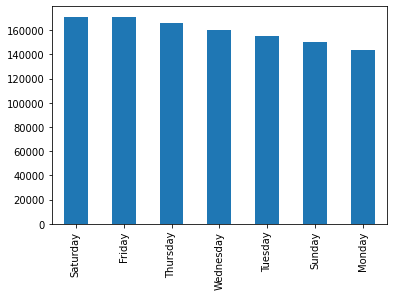

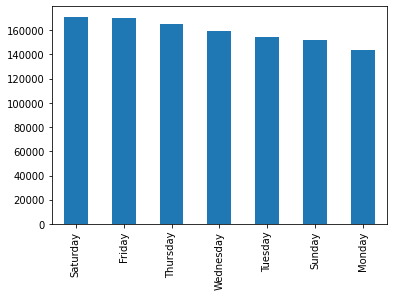

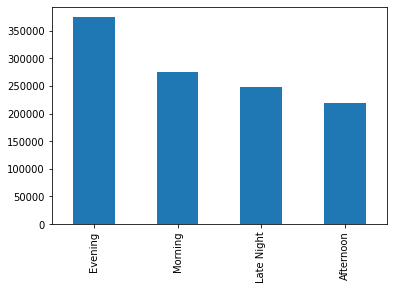

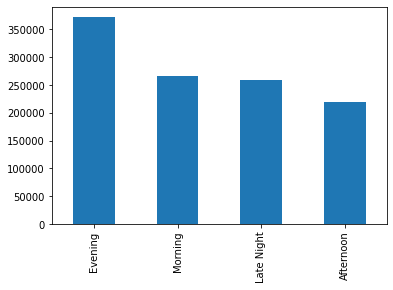

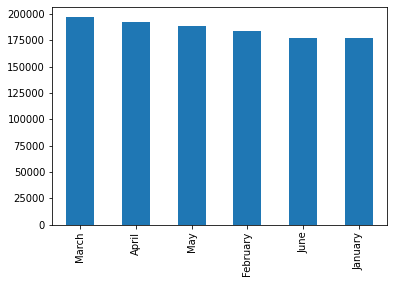

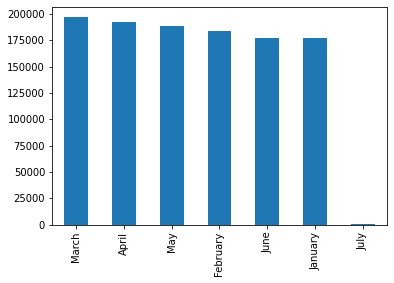

In [ ]:
import matplotlib.pyplot as plt

dataSet['pickup_day_name'].value_counts().plot(kind='bar')
plt.show()
dataSet['dropoff_day_name'].value_counts().plot(kind='bar')
plt.show()
dataSet['pickup_day_period'].value_counts().plot(kind='bar')
plt.show()
dataSet['dropoff_day_period'].value_counts().plot(kind='bar')
plt.show()
dataSet['pickup_month'].value_counts().plot(kind='bar')
plt.show()
dataSet['dropoff_month'].value_counts().plot(kind='bar')
plt.show()

We plot the trips duration grouped by the hour that the pickup occured, as instructed in the paper. We can see that the biggest durations occur on working-hours.

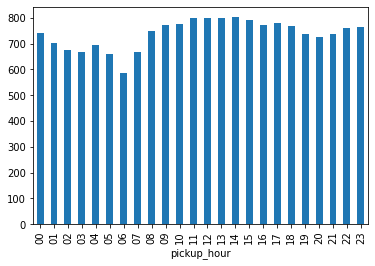

In [ ]:
grouping = dataSet.groupby(['pickup_hour'])
average = grouping['trip_duration'].mean()
average.plot.bar()

We plot the trips duration grouped by the day period that the pickup occured, as instructed in the paper. We can see that the biggest durations occur on evening(working-hours).

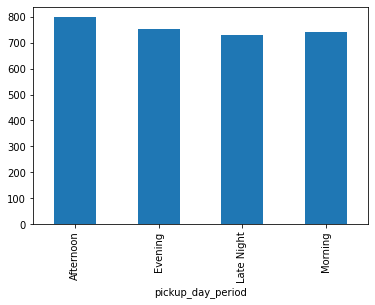

In [ ]:
grouping = dataSet.groupby(['pickup_day_period'])
average = grouping['trip_duration'].mean()
average.plot.bar()

We plot the trips duration grouped by the hour that the pickup occured, as instructed in the paper. We can see that the biggest durations occur on the work days.

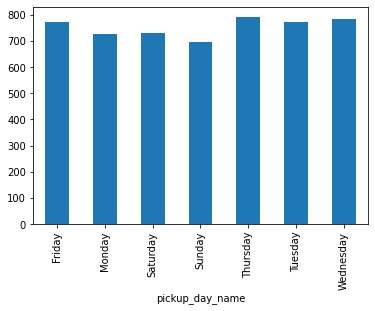

In [ ]:
grouping = dataSet.groupby(['pickup_day_name'])
average = grouping['trip_duration'].mean()
average.plot.bar()

**4)** We then plot a histogram for the 'trip_duration' column.

(array([ 3151.,  2194.,  3189.,  5783.,  8612., 11904., 16120., 18622.,
        21188., 23428., 26618., 26539., 27516., 29401., 28791., 28898.,
        28515., 29878., 28323., 27763., 28386., 26634., 26178., 25626.,
        25706., 24006., 23001., 23592., 21834., 21108., 20316., 20357.,
        18697., 18250., 18189., 16880., 16389., 16121., 14950., 14200.,
        13938., 13462., 12426., 11896., 11908., 11060., 10601., 10325.,
        10143.,  9263.,  8990.,  8754.,  8034.,  7774.,  7354.,  7428.,
         6756.,  6579.,  6471.,  5889.,  5780.,  5487.,  5532.,  5029.,
         4814.,  4688.,  4413.,  4065.,  3962.,  3680.,  3749.,  3451.,
         3434.,  3248.,  3027.,  3018.,  2849.,  2699.,  2549.,  2493.,
         2332.,  2258.,  2210.,  2012.,  1957.,  1874.,  1905.,  1729.,
         1663.,  1633.,  1573.,  1359.,  1354.,  1422.,  1325.,  1256.,
         1217.,  1114.,  1130.,  1141.]),
 array([1.00000e+00, 2.52900e+01, 4.95800e+01, 7.38700e+01, 9.81600e+01,
        1.22450e+02, 

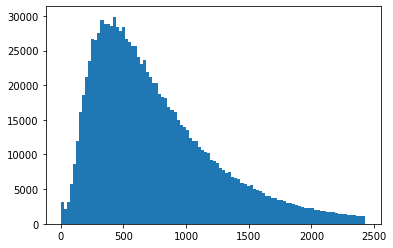

In [ ]:
plt.hist(dataSet['trip_duration'],bins=100)


Then we insert in the data set a new column, 'log_trip_duration' and we plot it as a histogram as well.

(array([2.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.2700e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.2300e+02,
        0.0000e+00, 0.0000e+00, 2.3000e+02, 0.0000e+00, 0.0000e+00,
        2.1400e+02, 0.0000e+00, 1.4300e+02, 0.0000e+00, 1.6300e+02,
        0.0000e+00, 1.5200e+02, 0.0000e+00, 1.7900e+02, 1.3700e+02,
        1.2700e+02, 1.1100e+02, 1.2300e+02, 1.3200e+02, 1.0900e+02,
        9.1000e+01, 1.1100e+02, 1.9200e+02, 9.0000e+01, 1.7500e+02,
        1.9000e+02, 1.8600e+02, 1.7300e+02, 1.6900e+02, 2.8500e+02,
        2.5700e+02, 2.5100e+02, 2.7500e+02, 3.0300e+02, 3.9900e+02,
        3.8000e+02, 4.7600e+02, 6.3700e+02, 7.0300e+02, 8.0700e+02,
        1.0890e+03, 1.4810e+03, 1.4930e+03, 2.1910e+03, 2.5710e+03,
        3.3560e+03, 3.7470e+03, 4.6710e+03, 5.8860e+03, 7.1960e+03,
        8.9240e+03, 1.0668e+04, 1.2223e+04, 1.4166e+04, 1.7295e+04,
        1.9259e+04, 2.1673e+04, 2.5674e+04, 2.76

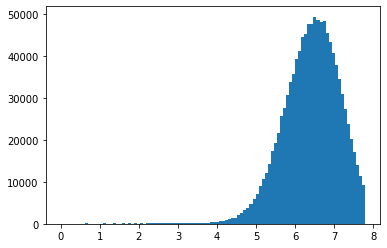

In [ ]:
dataSet.insert(1,"log_trip_duration",np.log(dataSet['trip_duration']))
plt.hist(dataSet['log_trip_duration'],bins=100)

We do the same insertion for the target data set.

In [ ]:
targetSet.insert(1,"log_trip_duration",np.log(targetSet['trip_duration']))

**5)** We plot the trips duration grouped by the vendors id, as instructed in the paper.

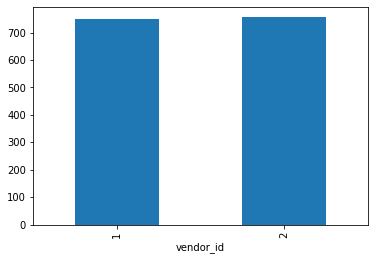

In [ ]:
vendorGrouping = dataSet.groupby(['vendor_id'])
average = vendorGrouping['trip_duration'].mean()
average.plot.bar()

**6)** We plot the trips duration grouped by the amount of passengers that a trip consists of, as instructed in the paper. We can see that the longest trips are usually the ones with 4 passengers.

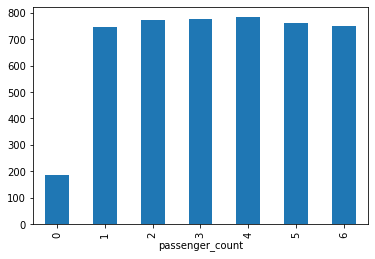

In [ ]:
passengerGrouping = dataSet.groupby(['passenger_count'])
average = passengerGrouping['trip_duration'].mean()
average.plot.bar()

**7)** We compute the manhattan distance of each row of the data set, and insert the new column as instructed in the paper.

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances

distances = []

for index, row in dataSet.iterrows():
  distances.append(manhattan_distances([[row['pickup_longitude'],row['pickup_latitude']]],[[row['dropoff_longitude'],row['dropoff_latitude']]])[0][0])

dataSet.insert(1,"manhattan_distance",distances)

We then do the same functionality for the test data set.

In [ ]:
distances = []

for index, row in testSet.iterrows():
  distances.append(manhattan_distances([[row['pickup_longitude'],row['pickup_latitude']]],[[row['dropoff_longitude'],row['dropoff_latitude']]])[0][0])

testSet.insert(1,"manhattan_distance",distances)

We plot the distances of the trips grouped by the week day that the pickup occured. We can see that the longest distances occured on Sundays because they are the days when most roadtrips,etc occur.

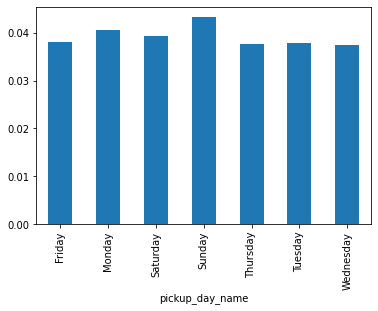

In [ ]:
dayGrouping = dataSet.groupby(['pickup_day_name'])
average = dayGrouping['manhattan_distance'].mean()
average.plot.bar()

Then we scatter plot the 'trip_duration' and 'manhattan_distance' columns. We can see that the longest the duration of the trip, the biggest the distance of the trip, which was expected.

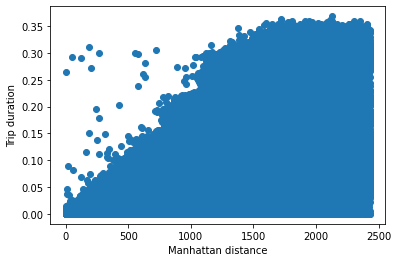

In [ ]:
plt.scatter(dataSet['trip_duration'],dataSet['manhattan_distance'])
plt.xlabel("Manhattan distance")
plt.ylabel("Trip duration")
plt.show()

**8)** We compute the average speed of all rows in the data frame and insert the new column in the set.

In [ ]:
averageSpeed = []

for index, row in dataSet.iterrows():
  averageSpeed.append(row['manhattan_distance']/row['trip_duration'])

dataSet.insert(1,"average_speed",averageSpeed)  

Then we plot the average speed of the trips grouped by the week day that the pickup occured. We can see that the most average speed occured on Sundays, which is probably because it is the less busiest.

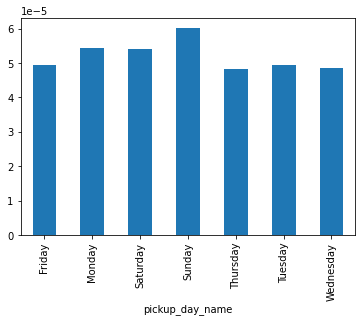

In [ ]:
dayGrouping = dataSet.groupby(['pickup_day_name'])
average = dayGrouping['average_speed'].mean()
average.plot.bar()

Then we plot the average speed of the trips grouped by the day hour that the pickup occured. We can see that the most average speed occured on hours that aren't that busy(non-working hours).

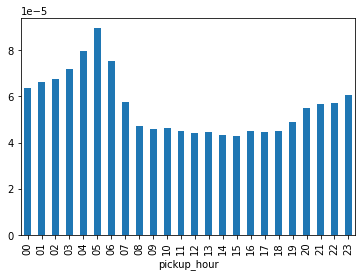

In [ ]:
timeGrouping = dataSet.groupby(['pickup_hour'])
average = timeGrouping['average_speed'].mean()
average.plot.bar()

Then we plot the average speed of the trips grouped by the month that the pickup occured.

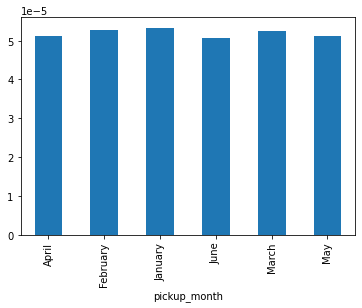

In [ ]:
monthGrouping = dataSet.groupby(['pickup_month'])
average = monthGrouping['average_speed'].mean()
average.plot.bar()

Then we drop the 'average_speed' column as we do not need it anymore, and was not instructed in the paper.

In [ ]:
dataSet = dataSet.drop('average_speed',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**9)** Finally we scatter plot the pickup longitude and latitude of all trips. We can see that most of the trips occured in the "center" of the map.

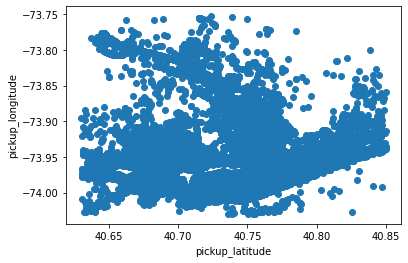

In [ ]:
plt.scatter(dataSet['pickup_latitude'],dataSet['pickup_longitude'])
plt.ylabel("pickup_longitude")
plt.xlabel("pickup_latitude")
plt.show()

Same functionality and results for the dropoffs of the same trips.

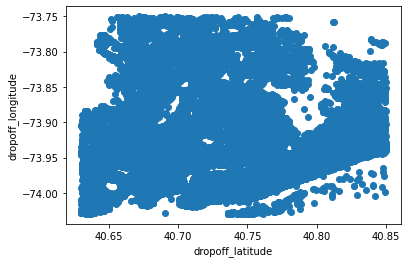

In [ ]:
plt.scatter(dataSet['dropoff_latitude'],dataSet['dropoff_longitude'])
plt.ylabel("dropoff_longitude")
plt.xlabel("dropoff_latitude")
plt.show()

**Συσταδοποίηση και πρόβλεψη διάρκειας ταξιδιού.**

We run the following code with the first 1000 rows of our dataset, for time-efficiency. I have also run all the cells until the grid search with the whole dataset and the results were more clear, but the grid search takes way too much time with the whole dataset. For this reason, we reduced the dataset and kept a usable amount of it.

**1)** First we use the elbow function in order to find the optimal number of clusters. We plot the results and keep the optimal number.

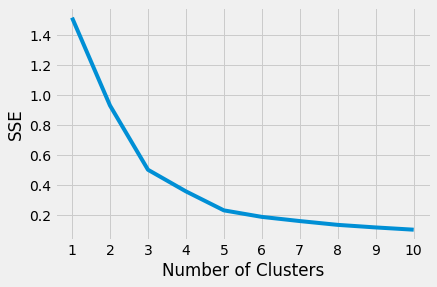

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

smallDataSet = dataSet.head(1000)
smallTestSet = testSet.head(1000)
smallTargetSet = targetSet.head(1000)

X = pd.concat([smallDataSet['pickup_longitude'],smallDataSet['pickup_latitude']],axis=1,keys=['pickup_longitude','pickup_latitude'])

sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Then, we execute the kMeans algorithm with number of clusters equal to the optimal number that we can extract from the above plot. As we can see, the items are clustered optimally between the 4 clusters that we initialized. Supposing we used the whole dataset, the results would be even clearer.

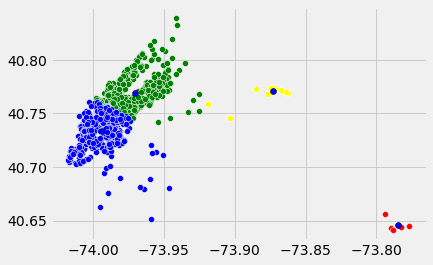

In [ ]:
kmeansModel = KMeans(n_clusters = 4).fit(X)
labels = np.asarray(kmeansModel.labels_)

colors = ['green','yellow','red','blue']

for index in range(4):
  label = X.iloc[np.where(labels == index)[0]]
  plt.scatter(label.iloc[:,0],label.iloc[:,1],color=colors[index],edgecolors='white')

centroids = kmeansModel.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],color=colors[index],edgecolors='black')
plt.show()

**2)** The following function transforms all strings from every row of the dataset (columns that we need) into numbers in order for the following part of the program to work.

In [ ]:
def digitization(dataFrame):

  dataFrame = dataFrame.replace(["Monday"],1)
  dataFrame = dataFrame.replace(["Tuesday"],2)
  dataFrame = dataFrame.replace(["Wednesday"],3)
  dataFrame = dataFrame.replace(["Thursday"],4)
  dataFrame = dataFrame.replace(["Friday"],5)
  dataFrame = dataFrame.replace(["Saturday"],6)
  dataFrame = dataFrame.replace(["Sunday"],7)

  dataFrame = dataFrame.replace(["January"],1)
  dataFrame = dataFrame.replace(["February"],2)
  dataFrame = dataFrame.replace(["March"],3)
  dataFrame = dataFrame.replace(["April"],4)
  dataFrame = dataFrame.replace(["May"],5)
  dataFrame = dataFrame.replace(["June"],6)
  dataFrame = dataFrame.replace(["July"],7)
  dataFrame = dataFrame.replace(["August"],8)
  dataFrame = dataFrame.replace(["September"],9)
  dataFrame = dataFrame.replace(["Octomber"],10)
  dataFrame = dataFrame.replace(["November"],11)
  dataFrame = dataFrame.replace(["December"],12)

  dataFrame = dataFrame.replace(["Summer"],1)
  dataFrame = dataFrame.replace(["Winter"],2)
  dataFrame = dataFrame.replace(["Spring"],3)
  dataFrame = dataFrame.replace(["Fall"],4)

  dataFrame = dataFrame.replace(["Morning"],1)
  dataFrame = dataFrame.replace(["Afternoon"],2)
  dataFrame = dataFrame.replace(["Evening"],3)
  dataFrame = dataFrame.replace(["Late Night"],4)

  return dataFrame

We initialize two sub-datasets that will be used for the random forests regression algorithm. Those sub-datasets include only the columns that we need, according to the paper.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

subDataSet = smallDataSet[
                     ["vendor_id", 
                      "passenger_count", 
                      "pickup_longitude", 
                      "pickup_latitude", 
                      "dropoff_longitude", 
                      "dropoff_latitude", 
                      "pickup_day_name", 
                      "pickup_month", 
                      "pickup_season", 
                      "pickup_day_period", 
                      "pickup_hour", 
                      "manhattan_distance"]
                     ]

subTestSet = smallTestSet[
                     ["vendor_id", 
                      "passenger_count", 
                      "pickup_longitude", 
                      "pickup_latitude", 
                      "dropoff_longitude", 
                      "dropoff_latitude", 
                      "pickup_day_name", 
                      "pickup_month", 
                      "pickup_season", 
                      "pickup_day_period", 
                      "pickup_hour", 
                      "manhattan_distance"]
                     ]

subDataSet = digitization(subDataSet)
subTestSet = digitization(subTestSet)

ar = dataSet['log_trip_duration'].head(1000).to_numpy()
ar = ar.flatten()

We train a random forest model, and use it in order to predict the results, using the test dataset.

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)

regr.fit(subDataSet,ar)
predictions = regr.predict(subTestSet)

Then we compare the results with the correct column, that is included in the target dataset, and print the Mean-Absolute-Error and Mean-Squared-Error.

In [ ]:
import sklearn.metrics as metrics

mae = metrics.mean_absolute_error(predictions,smallTargetSet['log_trip_duration'])
mse = metrics.mean_squared_error(predictions,smallTargetSet['log_trip_duration'])

print("MAE:",mae)
print("MSE:", mse)

MAE: 0.37804078754417675
MSE: 0.26066370192160115


**3)** In this part we train a grid search model in order to find the best parameters that we should use with our dataset, in order to minimize both our errors.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300, 1000]
}

grid_search = GridSearchCV(estimator = regr,param_grid = params)
grid_search.fit(subDataSet,ar)

grid_search.best_params_

{'max_depth': 80, 'max_features': 3, 'n_estimators': 300}

**4)** We then again train a random forest model, predict again using the test set and print both our errors. We can see that both the Mean-Absolute-Error and Mean-Squared-Error were reduced. We expected this to happen though, as we intentionally used grid search so that we could re-train the model using the optimal parameters.

In [ ]:
regr = RandomForestRegressor(max_depth=80, max_features=3, n_estimators=300)

regr.fit(subDataSet,ar)
predictions = regr.predict(subTestSet)

mae = metrics.mean_absolute_error(predictions,smallTargetSet['log_trip_duration'])
mse = metrics.mean_squared_error(predictions,smallTargetSet['log_trip_duration'])

print("MAE:",mae)
print("MSE:", mse)

MAE: 0.34454737983625294
MSE: 0.22034719943905276
